In [50]:
import yoda
import os
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [22]:
hist_name='d01-x01-y01'
data_hist_path = os.path.join(os.getcwd(), 'rivet_histograms', 'data', 'ALEPH_1996_S3486095.yoda')
hist = yoda.read(data_hist_path)
hist_0=hist['/REF/ALEPH_1996_S3486095/d01-x01-y01']

In [24]:
hist_0.xVals()

array([0.0025, 0.0075, 0.0125, 0.0175, 0.0225, 0.0275, 0.0325, 0.0375,
       0.045 , 0.055 , 0.07  , 0.09  , 0.11  , 0.14  , 0.18  , 0.225 ,
       0.275 , 0.325 , 0.375 , 0.45  , 0.55  , 0.65  , 0.75  ])

In [25]:
def return_data_hist_yoda(hist_name='d01-x01-y01'):
    print('data hist name = ', hist_name)
    data_hist_path = os.path.join(os.getcwd(), 'rivet_histograms', 'data', 'ALEPH_1996_S3486095.yoda')
    tree_name_data='/REF/ALEPH_1996_S3486095'
    yoda_file = yoda.read(data_hist_path)
    full_hist_name = '%s/%s' % (tree_name_data, hist_name)
    yoda_hist = yoda_file[full_hist_name]
    hist_edges = yoda_hist.xVals()
    hist_values = yoda_hist.yVals()
    return hist_edges, hist_values

In [29]:
hist1_data = return_data_hist_yoda(hist_name='d01-x01-y01')
hist1_data

data hist name =  d01-x01-y01


(array([0.0025, 0.0075, 0.0125, 0.0175, 0.0225, 0.0275, 0.0325, 0.0375,
        0.045 , 0.055 , 0.07  , 0.09  , 0.11  , 0.14  , 0.18  , 0.225 ,
        0.275 , 0.325 , 0.375 , 0.45  , 0.55  , 0.65  , 0.75  ]),
 array([1.236e+01, 2.333e+01, 2.023e+01, 1.669e+01, 1.341e+01, 1.079e+01,
        8.870e+00, 7.408e+00, 5.922e+00, 4.508e+00, 3.258e+00, 2.317e+00,
        1.742e+00, 1.211e+00, 8.132e-01, 5.626e-01, 3.973e-01, 2.903e-01,
        2.224e-01, 1.476e-01, 8.610e-02, 4.470e-02, 1.160e-02]))

In [42]:
def return_simulation_hist_yoda(filename = 'ALEPH_1996_S3486095_card_0.yoda', hist_name='d01-x01-y01'):
    print('simulation hist name = ', hist_name)
    simulation_hist_path = os.path.join(os.getcwd(), 'rivet_histograms', 'simulation', filename)
    yoda_file = yoda.read(simulation_hist_path)
    tree_name_simulation='/ALEPH_1996_S3486095'
    
    full_hist_name = '%s/%s' % (tree_name_simulation, hist_name)
    yoda_hist = yoda_file[full_hist_name]
    hist_edges = yoda_hist.xVals()
    hist_values = yoda_hist.yVals()
    return hist_edges, hist_values

In [43]:
hist1_simulation = return_simulation_hist_yoda(filename = 'ALEPH_1996_S3486095_card_0.yoda', hist_name='d01-x01-y01')
hist1_simulation

simulation hist name =  d01-x01-y01


(array([0.0025, 0.0075, 0.0125, 0.0175, 0.0225, 0.0275, 0.0325, 0.0375,
        0.045 , 0.055 , 0.07  , 0.09  , 0.11  , 0.14  , 0.18  , 0.225 ,
        0.275 , 0.325 , 0.375 , 0.45  , 0.55  , 0.65  , 0.75  ]),
 array([1.18660e+01, 2.36200e+01, 2.07020e+01, 1.71500e+01, 1.37320e+01,
        1.11620e+01, 9.01800e+00, 7.53600e+00, 6.07700e+00, 4.45700e+00,
        3.32200e+00, 2.25600e+00, 1.70850e+00, 1.17475e+00, 7.94750e-01,
        5.31200e-01, 3.73600e-01, 2.73600e-01, 2.04200e-01, 1.42300e-01,
        7.81000e-02, 4.02000e-02, 9.50000e-03]))

In [44]:
def chi2(data_hist, sim_hist):
    assert len(data_hist) == len(sim_hist)
    num = (data_hist - sim_hist)**2
    den = data_hist + 1E-20
    return np.sum(num/den)


In [45]:
def get_hist_names():
    hist_names=[]
    for i in range(1,44):
        hist_names.append('d{:02d}-x01-y01'.format(i) )
        #13-16 and 24 not present in yoda files
    hist_names.remove('d13-x01-y01')
    hist_names.remove('d14-x01-y01')
    hist_names.remove('d15-x01-y01')
    hist_names.remove('d16-x01-y01')
    hist_names.remove('d24-x01-y01')
    # d25-x01-y01 gives error of unequal lengths
    hist_names.remove('d25-x01-y01')
    hist_names.remove('d26-x01-y01')
    hist_names.remove('d27-x01-y01')
    hist_names.remove('d41-x01-y01')
    hist_names.remove('d42-x01-y01')

    return hist_names

In [46]:
def overall_chi2(sim_yoda_file='ALEPH_1996_S3486095_card_0.yoda'):
    """ over all histograms"""

    hist_names = get_hist_names()
    overall_chi2 = 0
    for hist_name in hist_names:
        data_hist_edges, data_hist = return_data_hist_yoda(hist_name=hist_name)
        simulation_hist_edges, simulation_hist = return_simulation_hist_yoda(filename =sim_yoda_file , hist_name=hist_name)
        chi2_ = chi2(data_hist,simulation_hist)
        overall_chi2 += chi2_
        

    return overall_chi2

In [47]:
overall_chi2(sim_yoda_file='ALEPH_1996_S3486095_card_0.yoda')

data hist name =  d01-x01-y01
simulation hist name =  d01-x01-y01
data hist name =  d02-x01-y01
simulation hist name =  d02-x01-y01
data hist name =  d03-x01-y01
simulation hist name =  d03-x01-y01
data hist name =  d04-x01-y01
simulation hist name =  d04-x01-y01
data hist name =  d05-x01-y01
simulation hist name =  d05-x01-y01
data hist name =  d06-x01-y01
simulation hist name =  d06-x01-y01
data hist name =  d07-x01-y01
simulation hist name =  d07-x01-y01
data hist name =  d08-x01-y01
simulation hist name =  d08-x01-y01
data hist name =  d09-x01-y01
simulation hist name =  d09-x01-y01
data hist name =  d10-x01-y01
simulation hist name =  d10-x01-y01
data hist name =  d11-x01-y01
simulation hist name =  d11-x01-y01
data hist name =  d12-x01-y01
simulation hist name =  d12-x01-y01
data hist name =  d17-x01-y01
simulation hist name =  d17-x01-y01
data hist name =  d18-x01-y01
simulation hist name =  d18-x01-y01
data hist name =  d19-x01-y01
simulation hist name =  d19-x01-y01
data hist 

31.493337540445157

In [54]:
def plt_sim_data_hist(ax, hist_name='d05-x01-y01'):
    data_hist_0_edges, data_hist_0 = return_data_hist_yoda(hist_name)
    simulation_hist_0_edges, simulation_hist_0 = return_simulation_hist_yoda(filename = 'ALEPH_1996_S3486095_card_0.yoda', hist_name=hist_name)
    ax.step(y=data_hist_0, x= data_hist_0_edges, label='data {}'.format( hist_name),alpha=0.4)
    ax.step(y=simulation_hist_0, x=simulation_hist_0_edges, label='simulation {}'.format(hist_name),alpha=0.4)
    ax.legend()

data hist name =  d01-x01-y01
simulation hist name =  d01-x01-y01


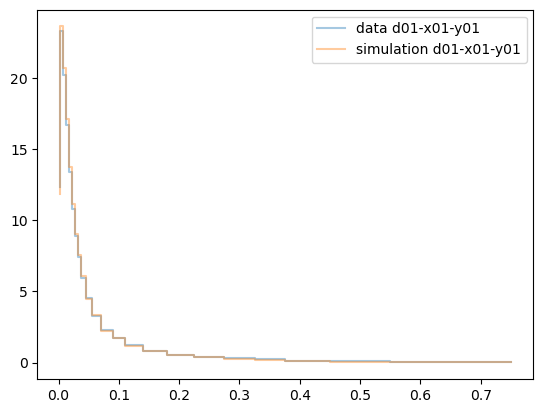

In [55]:
fig, ax =plt.subplots(1,1)
plt_sim_data_hist(ax, hist_name='d01-x01-y01')

33
data hist name =  d01-x01-y01
simulation hist name =  d01-x01-y01
data hist name =  d02-x01-y01
simulation hist name =  d02-x01-y01
data hist name =  d03-x01-y01
simulation hist name =  d03-x01-y01
data hist name =  d04-x01-y01
simulation hist name =  d04-x01-y01
data hist name =  d05-x01-y01
simulation hist name =  d05-x01-y01
data hist name =  d06-x01-y01
simulation hist name =  d06-x01-y01
data hist name =  d07-x01-y01
simulation hist name =  d07-x01-y01
data hist name =  d08-x01-y01
simulation hist name =  d08-x01-y01
data hist name =  d09-x01-y01
simulation hist name =  d09-x01-y01
data hist name =  d10-x01-y01
simulation hist name =  d10-x01-y01
data hist name =  d11-x01-y01
simulation hist name =  d11-x01-y01
data hist name =  d12-x01-y01
simulation hist name =  d12-x01-y01
data hist name =  d17-x01-y01
simulation hist name =  d17-x01-y01
data hist name =  d18-x01-y01
simulation hist name =  d18-x01-y01
data hist name =  d19-x01-y01
simulation hist name =  d19-x01-y01
data hi

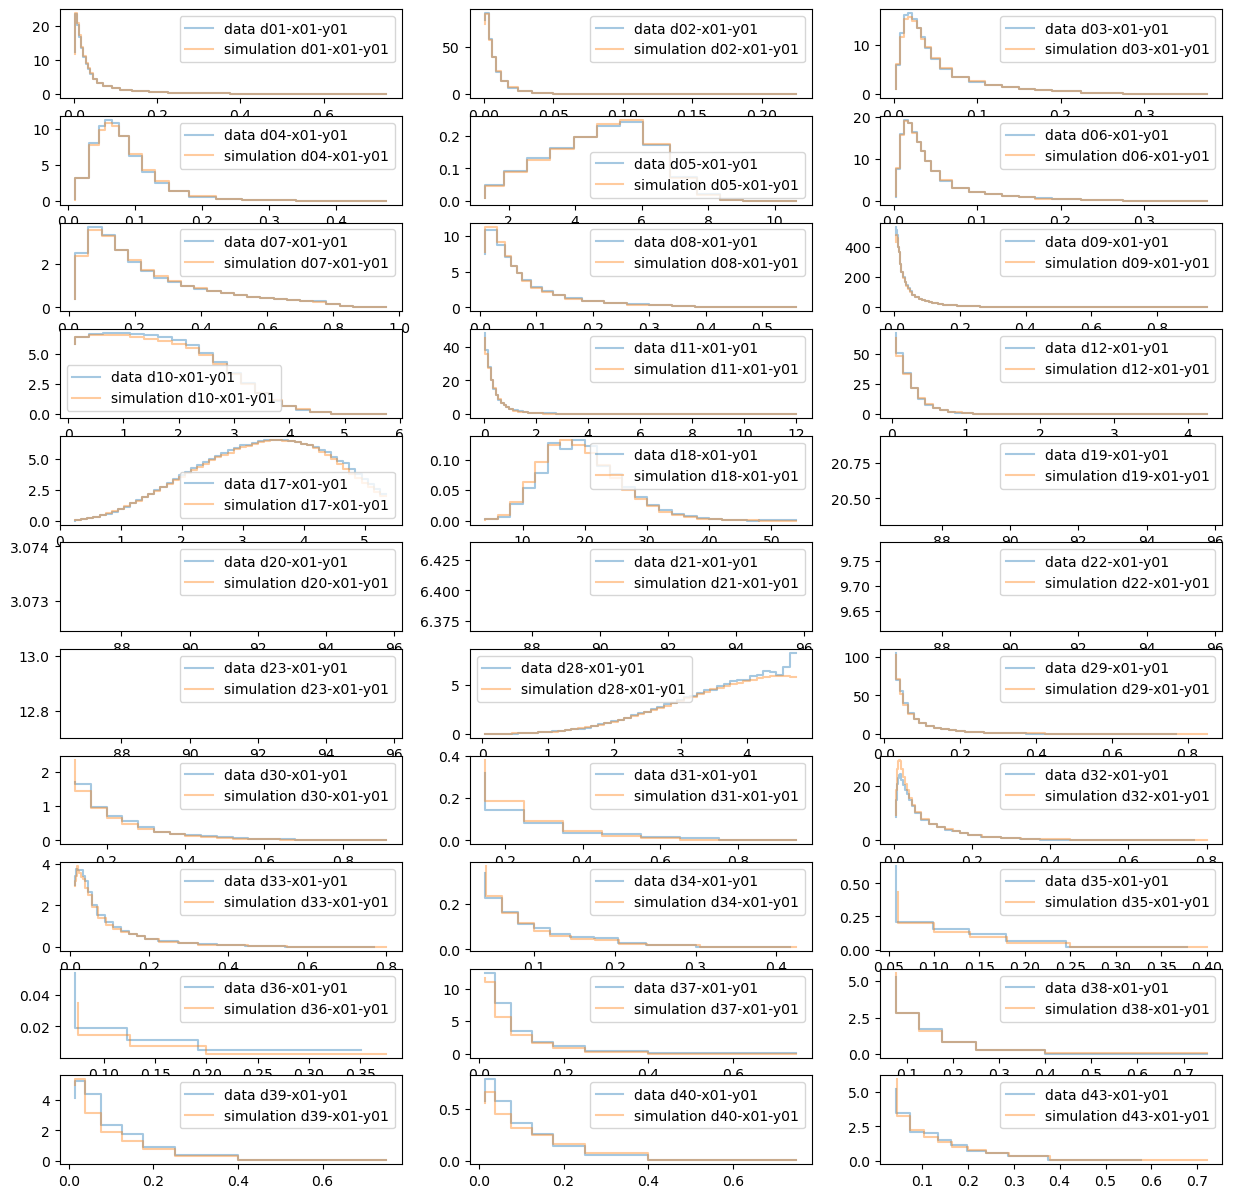

In [56]:
hist_names = get_hist_names()
print(len(hist_names))
nrows=11; ncols = 3
fig, ax = plt.subplots(nrows,ncols, figsize=(15,15), edgecolor='k')
ax = ax.ravel()
for hist_ind, hist_name in enumerate(hist_names):
    plt_sim_data_hist(ax=ax[hist_ind], hist_name=hist_name)